# **TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL**  
## TRABAJO PRÁCTICO N° 2: MINERÍA DE DATOS  
### **INTEGRANTES:** Caballero, Franco - (C-7328/8) | Grimaldi, Damián - (G-5977/3)
### **Fecha Límite de Entrega:** 21/05/2025  
### **Semestre:** 1° Semestre 2025


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier

In [71]:
# Descargamos df Companias
!gdown 1Y7Vj70e32tL260InpuPuzxguitF4d7zx -O 1000_Companies.csv

# Descargamos df Drogas
!gdown 1jTk-ssE30zsbV9V6VDss_Gu_dn_N6UnD -O drugType.csv


Downloading...
From: https://drive.google.com/uc?id=1Y7Vj70e32tL260InpuPuzxguitF4d7zx
To: /content/1000_Companies.csv
100% 52.2k/52.2k [00:00<00:00, 4.35MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jTk-ssE30zsbV9V6VDss_Gu_dn_N6UnD
To: /content/drugType.csv
100% 6.29k/6.29k [00:00<00:00, 15.8MB/s]


# Ejercicio 1. EDA Companias

**VARIABLES**

RyD_Spend -> Gasto en Investigación y Desarrollo (cantidad de dinero invertido)  
Administracion -> Gasto en Administración (cantidad de dinero invertido en funciones administrativas)  
MarketingSpend -> Gasto en Marketing (cantidad de dinero invertido en Marketing)     
State → Estado en el que opera la empresa (variable categórica que representa la localización geográfica dentro del país).

**TARGET**  
Profit -> Ganancias obtenidas (ganancias netas de la empresa luego de los gastos)  


In [72]:
companias = pd.read_csv('1000_Companies.csv')
companias.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Nulos y Duplicados

In [73]:
# Podemos observar que no hay nulos
companias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [74]:
# Podemos observar que hay una fila duplicada
companias[companias.duplicated() == True]

,RyD_Spend,Administration,MarketingSpend,State,Profit
755,84533.0,122941.3141,231885.6935,California,121248.7116


In [75]:
# Eliminamos la fila duplicada
companias.drop_duplicates(inplace=True)

## Particion de los Datos

In [76]:
# Definimos las features relevantes y la variable target
features = [
    'RyD_Spend', 'Administration', 'MarketingSpend', 'State'
]
target = 'Profit'

# Separamos en conjuntos de entrenamiento y prueba usando únicamente las features definidas (80-20)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(companias[features], companias[target], test_size=0.2, random_state=42)

# Separamos en conjuntos de entrenamiento y prueba usando únicamente las features definidas (70-30)
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(companias[features], companias[target], test_size=0.3, random_state=42)


## Visualización de los Datos

In [77]:
# Crear df_visualizacion con solo variables numéricas + Profit
df_visualizacion = X_train_c.select_dtypes(include='number').copy()
df_visualizacion['Profit'] = y_train_c

# Verificamos
df_visualizacion.head()


,RyD_Spend,Administration,MarketingSpend,Profit
779,70521.0,120871.9581,204849.5013,109278.38090
286,57470.0,118944.5270,179667.5611,98129.02423
165,137388.0,130747.1813,333869.5604,166402.28200
961,16459.0,112887.8357,100536.7246,63093.68082
493,99603.0,125166.9203,260963.2997,134122.88260


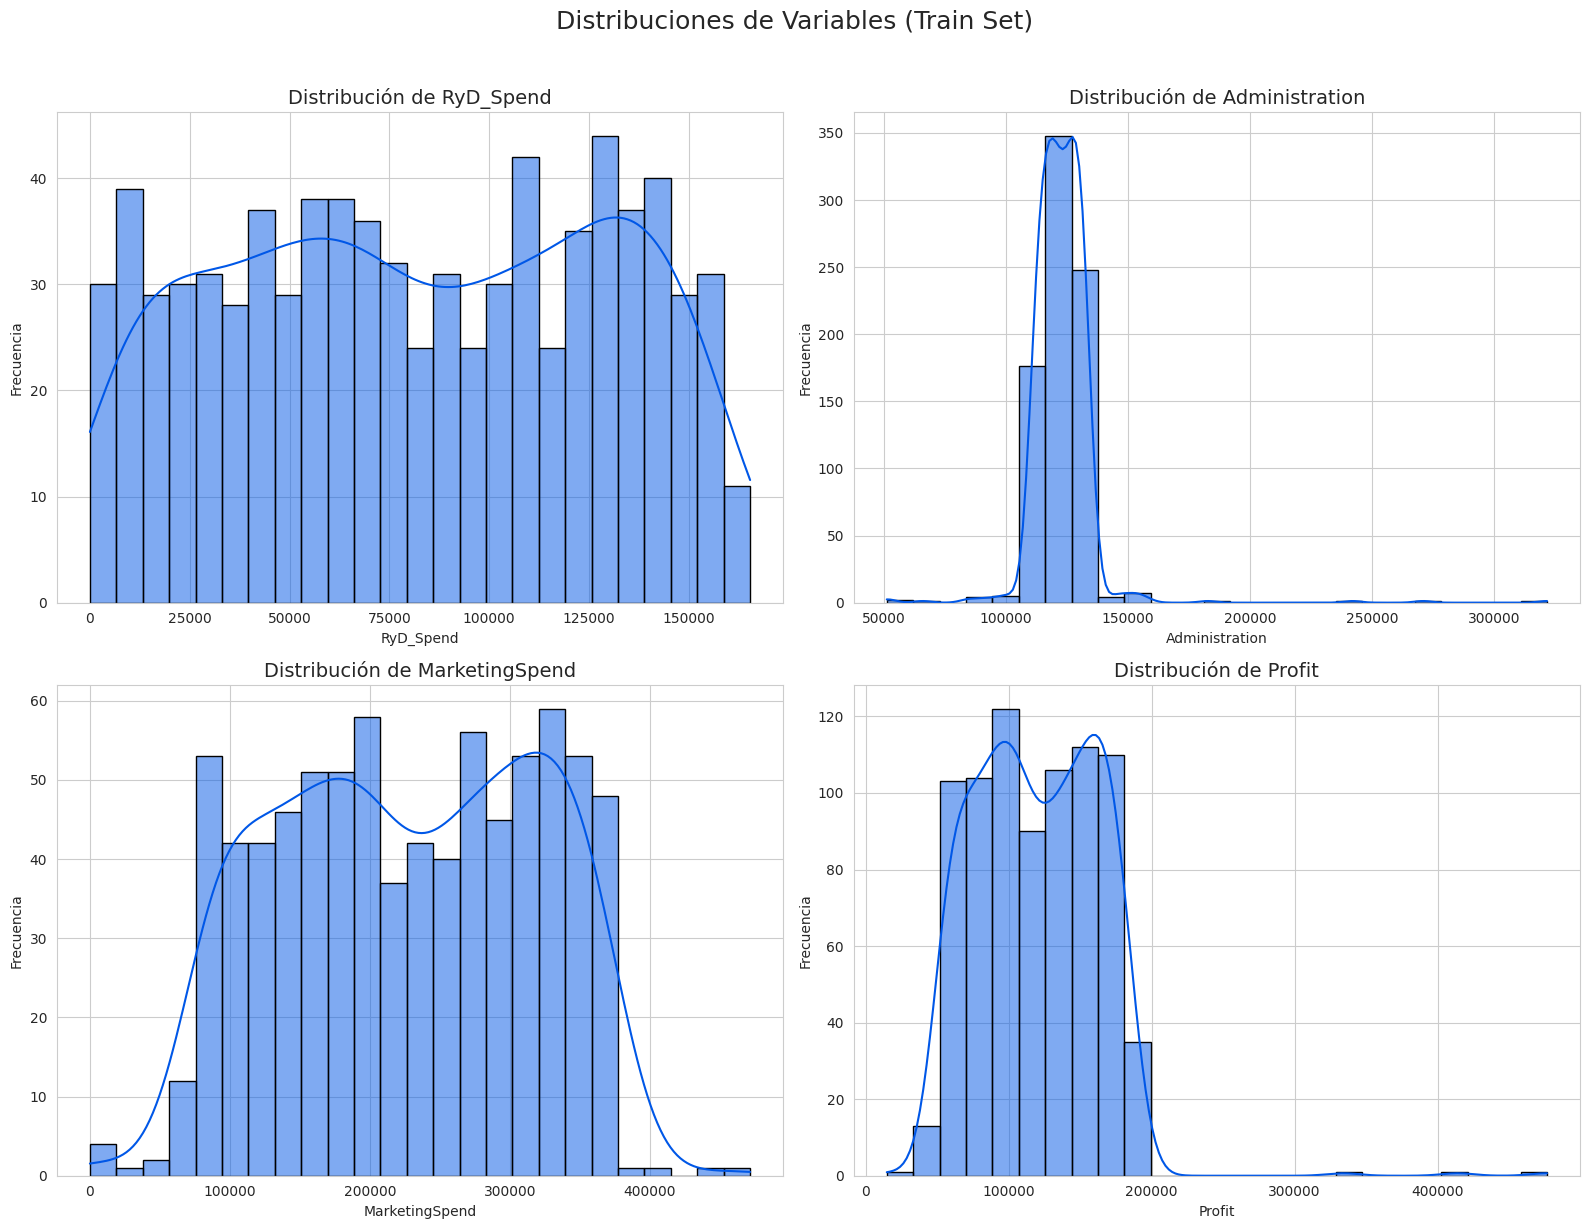

In [78]:
# Estilo visual
sns.set_style("whitegrid")

# Color
color_fuerte = '#0057e7'  # azul intenso

# Figura
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_visualizacion.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_visualizacion[col], bins=25, kde=True, color=color_fuerte, edgecolor='black')
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.suptitle('Distribuciones de Variables (Train Set)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


Se puede observar que RyD_Spend y MarketingSpend tienen una distribución aproximadamente uniforme, mientras que Administration y Profit presentan una distribución sesgada a la derecha.  
Se observan distribuciones más dispersas en RyD y Marketing, mientras que Administración y Profit muestran concentraciones claras y valores extremos.

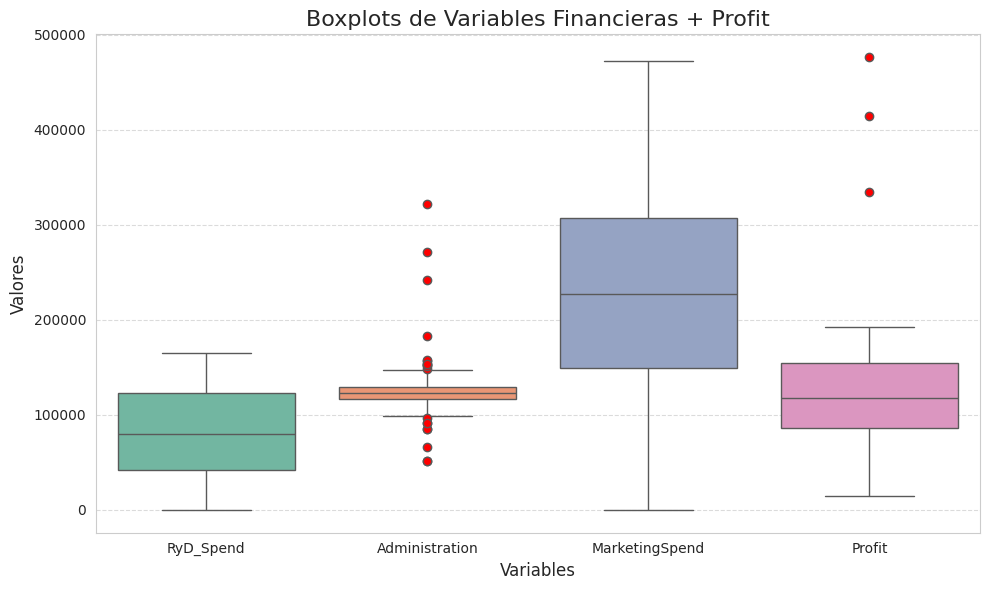

In [79]:
# Visualizamos BoxPlot
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_visualizacion,
            palette="Set2",    # colores
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))

plt.title('Boxplots de Variables Financieras + Profit', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # grilla solo horizontal suave
plt.tight_layout()
plt.show()


Se observan algunos outliers en Administration lo que sugiere que algunas empresas destinan significativamente más recursos administrativos que otras. También hay pocos outliers en Profit, indicando que unas pocas empresas logran un éxito financiero considerablemente mayor que el resto.

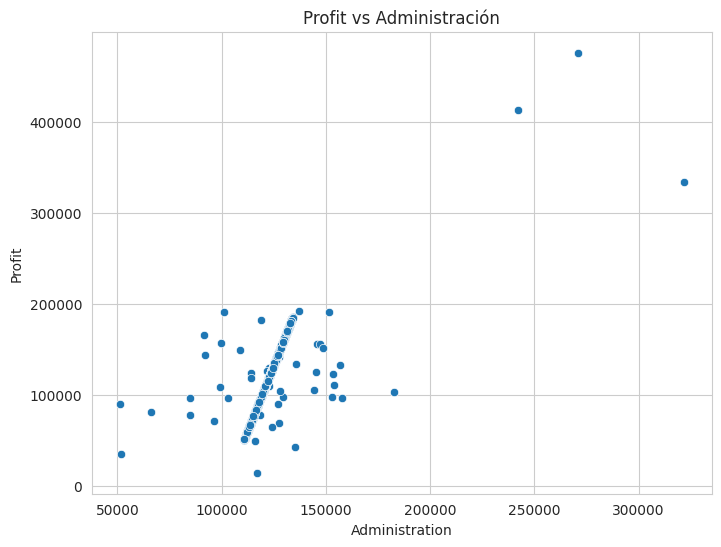

In [80]:
# Para tomar una mejor decision sobre los outliers, decidimos graficarlos a ver si estan justificados con otras variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_visualizacion, x='Administration', y='Profit')
plt.title('Profit vs Administración')
plt.grid(True)
plt.show()


A partir del gráfico de dispersión entre Profit y Administration, se observa que los 3 valores altos que tiene Profit, tambien son muy altos en Administration. Lo cual sugiere que estos valores no son errores ni valores sin sentido, sino que están justificados con un patrón lógico: mayor inversión en administracion se asocia a mayores ganancias de la empresa

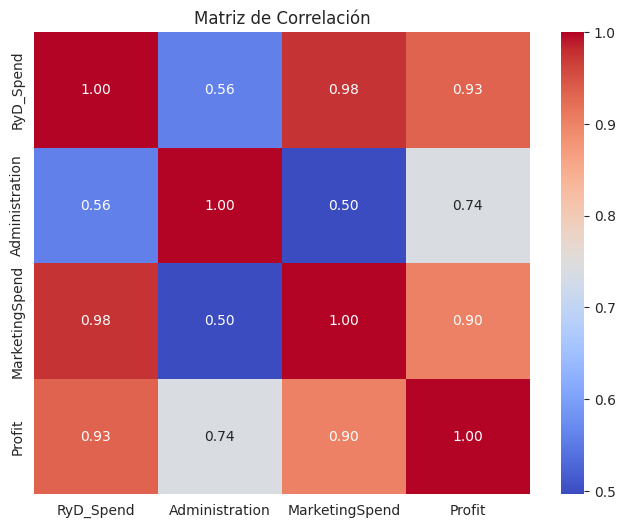

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(df_visualizacion.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


La variable objetivo Profit muestra una fuerte correlación positiva con las variables RyD_Spend y MarketingSpend indicando que mayores inversiones en investigación y marketing se asocian con mayores ganancias. La correlación con Administration es algo menor pero sigue siendo significativa, sugiriendo también un impacto positivo del gasto en administración sobre las utilidades.

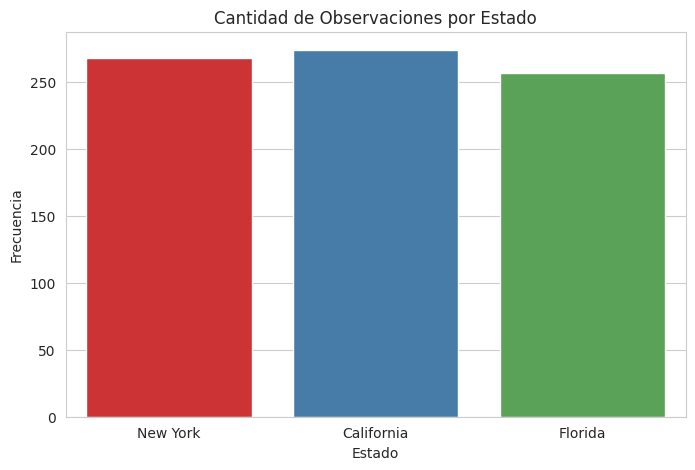

In [82]:
plt.figure(figsize=(8, 5))
sns.countplot(data=X_train_c, x='State', hue='State', palette='Set1', dodge=False, legend=False)
plt.title('Cantidad de Observaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.show()


Al observar el número de empresas por estado mediante un countplot, se evidencia que la cantidad de empresas es similar en los tres estados (New York, California y Florida).

## Codificacion

In [83]:
# Aplicamos get_dummies a ambas particiones, asegurando que tengan las mismas columnas
X_train_codificado = pd.get_dummies(X_train_c, columns=['State'], drop_first=True)
X_test_codificado = pd.get_dummies(X_test_c, columns=['State'], drop_first=True)

# Alineamos las columnas para evitar errores en el modelo
X_train_codificado, X_test_codificado = X_train_codificado.align(X_test_codificado, join='left', axis=1, fill_value=0)


In [84]:
# Hacemos lo mismo para el de 70-30

# Aplicamos get_dummies a ambas particiones, asegurando que tengan las mismas columnas
X_train_codificado2 = pd.get_dummies(X_train_c2, columns=['State'], drop_first=True)
X_test_codificado2 = pd.get_dummies(X_test_c2, columns=['State'], drop_first=True)

# Alineamos las columnas para evitar errores en el modelo
X_train_codificado2, X_test_codificado2 = X_train_codificado2.align(X_test_codificado2, join='left', axis=1, fill_value=0)

## Escalado

In [85]:
# Columnas a escalar
columnas_a_escalar = ['RyD_Spend', 'Administration', 'MarketingSpend']

# Inicializamos el escalador
scaler = StandardScaler()

# Creamos copias para no modificar los originales
X_train_escalado = X_train_codificado.copy()
X_test_escalado = X_test_codificado.copy()

# Ajustamos y transformamos solo las columnas numéricas del entrenamiento
X_train_escalado[columnas_a_escalar] = scaler.fit_transform(X_train_escalado[columnas_a_escalar])

# Usamos el mismo escalador para transformar el test
X_test_escalado[columnas_a_escalar] = scaler.transform(X_test_escalado[columnas_a_escalar])


In [86]:
# Escalamos el segundo conjunto de datos (70-30)

# Creamos copias para no modificar los originales
X_train_escalado2 = X_train_codificado2.copy()
X_test_escalado2 = X_test_codificado2.copy()

# Ajustamos y transformamos solo las columnas numéricas del entrenamiento
X_train_escalado2[columnas_a_escalar] = scaler.fit_transform(X_train_escalado2[columnas_a_escalar])

# Usamos el mismo escalador para transformar el test
X_test_escalado2[columnas_a_escalar] = scaler.transform(X_test_escalado2[columnas_a_escalar])


# Ejercicio 2. Predicción con Arboles de Decisión

In [87]:
# Definimos el modelo de árbol de decisión para clasificación
tree_reg = DecisionTreeRegressor(random_state=13)


In [88]:
# Definimos los parametros a ajustar
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Valores de profundidad máxima
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 10],  # Número mínimo de muestras por hoja
    'criterion': ['squared_error', 'friedman_mse']  # Criterio para el cálculo del error
}

# Ajustar el modelo en el conjunto 80-20
grid_search_80_20 = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_80_20.fit(X_train_escalado, y_train_c)
best_tree_reg_80_20 = grid_search_80_20.best_estimator_

# Ajustar el modelo en el conjunto 70-30
grid_search_70_30 = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_70_30.fit(X_train_escalado2, y_train_c2)
best_tree_reg_70_30 = grid_search_70_30.best_estimator_

print("Mejores hiperparámetros encontrados en particion 80-20:", grid_search_80_20.best_params_)
print("Mejores hiperparámetros encontrados en particion 70-30:", grid_search_70_30.best_params_)


Mejores hiperparámetros encontrados en particion 80-20: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejores hiperparámetros encontrados en particion 70-30: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [89]:
def grafico_arbol (arbol, feature_names, title, max_depth=None):
    plt.figure(figsize=(20,10))
    plot_tree(arbol, feature_names=feature_names, filled=True, rounded=True, fontsize=8, max_depth=max_depth)
    plt.title(title)
    plt.show()

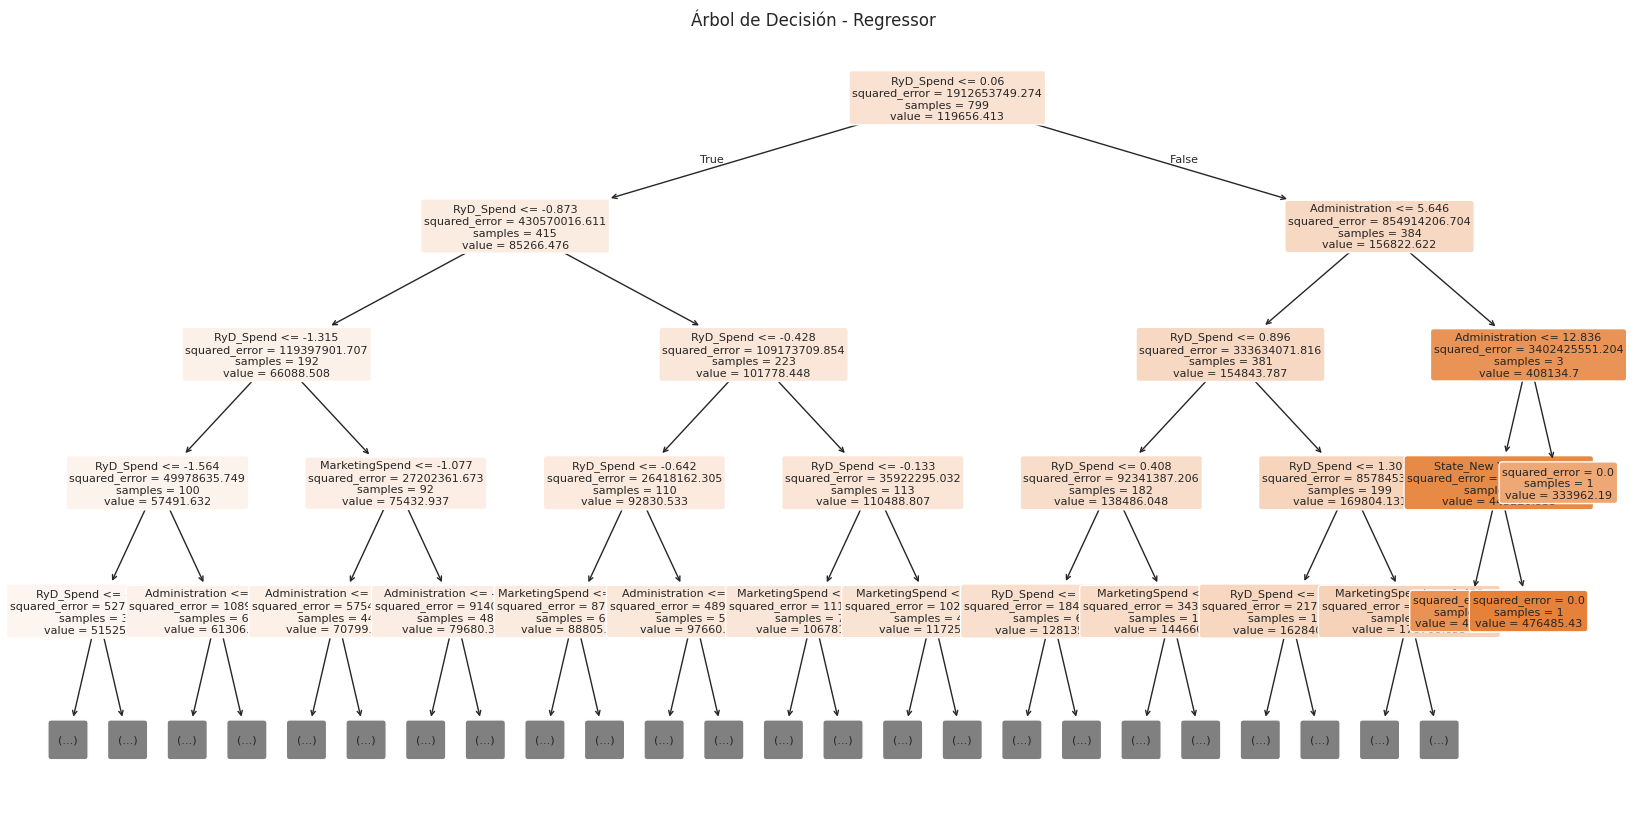

In [90]:
# Se limita la cantidad de max_depth para poder tener una mejor visualizacion del grafico
grafico_arbol(best_tree_reg_80_20, X_train_escalado.columns, "Árbol de Decisión - Regressor", max_depth=4)

Algunas cosas que podemos observar a partir del arbol es que a partir del nodo raíz podemos concluir que RyD_Spend es la variable más importante según el criterio de reducción del error cuadrático. A medida que se profundiza en el árbol, RyD_Spend aparece varias veces, lo que refuerza su gran poder predictivo.

Por otra parte podemos ver que el lado izquierdo tiene valores promedio del target más bajos (por ejemplo, value = 57491.632). Lo que sugiere que un menor gasto en RyD se asocia con menores retornos o rendimiento



## Metricas

In [91]:
# Función para calcular y mostrar métricas
def calcular_metricas(y_true, y_pred, conjunto=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"===== Métricas sobre el Conjunto {conjunto} =====")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    return mae, mse, rmse

# Predicciones y métricas para el conjunto 80-20
y_pred_train = best_tree_reg_80_20.predict(X_train_escalado)
y_pred_test = best_tree_reg_80_20.predict(X_test_escalado)

# Calcular métricas para 80-20
print("===== Resultados para el Conjunto 80-20 =====")
mae_train, mse_train, rmse_train = calcular_metricas(y_train_c, y_pred_train, "ENTRENAMIENTO")
mae_test, mse_test, rmse_test = calcular_metricas(y_test_c, y_pred_test, "TEST")

print("\n")

# Predicciones y métricas para el conjunto 70-30
y_pred_train2 = best_tree_reg_70_30.predict(X_train_escalado2)
y_pred_test2 = best_tree_reg_70_30.predict(X_test_escalado2)

# Calcular métricas para 70-30
print("===== Resultados para el Conjunto 70-30 =====")
mae_train2, mse_train2, rmse_train2 = calcular_metricas(y_train_c2, y_pred_train2, "ENTRENAMIENTO")
mae_test2, mse_test2, rmse_test2 = calcular_metricas(y_test_c2, y_pred_test2, "TEST")

# Comparación de resultados
print("\n===== Comparación de Resultados =====")
print(f"Conjunto 80-20 vs Conjunto 70-30")

print(f"MAE (Entrenamiento): {mae_train:.2f} vs {mae_train2:.2f}")
print(f"MSE (Entrenamiento): {mse_train:.2f} vs {mse_train2:.2f}")
print(f"RMSE (Entrenamiento): {rmse_train:.2f} vs {rmse_train2:.2f}")

print(f"MAE (Test): {mae_test:.2f} vs {mae_test2:.2f}")
print(f"MSE (Test): {mse_test:.2f} vs {mse_test2:.2f}")
print(f"RMSE (Test): {rmse_test:.2f} vs {rmse_test2:.2f}")


===== Resultados para el Conjunto 80-20 =====
===== Métricas sobre el Conjunto ENTRENAMIENTO =====
MAE:  39.32
MSE:  6114.32
RMSE: 78.19
===== Métricas sobre el Conjunto TEST =====
MAE:  286.19
MSE:  1135508.96
RMSE: 1065.60


===== Resultados para el Conjunto 70-30 =====
===== Métricas sobre el Conjunto ENTRENAMIENTO =====
MAE:  37.32
MSE:  6251.28
RMSE: 79.07
===== Métricas sobre el Conjunto TEST =====
MAE:  455.19
MSE:  4302731.28
RMSE: 2074.30

===== Comparación de Resultados =====
Conjunto 80-20 vs Conjunto 70-30
MAE (Entrenamiento): 39.32 vs 37.32
MSE (Entrenamiento): 6114.32 vs 6251.28
RMSE (Entrenamiento): 78.19 vs 79.07
MAE (Test): 286.19 vs 455.19
MSE (Test): 1135508.96 vs 4302731.28
RMSE (Test): 1065.60 vs 2074.30


En el conjunto de 80-20, las métricas de error (MAE, MSE, RMSE) son ligeramente mayores en comparación con el conjunto 70-30. En el conjunto 70-30, el desempeño en el conjunto de test se deteriora notablemente, con MAE de 455.19, MSE de 4302731.28 y RMSE de 2074.30. Esto muestra una clara diferencia en la capacidad de generalización del modelo, donde el modelo con el 80% de datos de entrenamiento parece generalizar mejor.

# Ejercicio N° 3 EDA Tipos de Droga

**VARIABLES**

Edad -> Edad del paciente ( en años )  
Sexo -> Sexo del paciente (F = Femenino, M = Masculino )  
BP -> Presión sanguínea ( Alto, Normal, bajo )  
Colesterol -> Nivel de colesterol del paciente ( Alto, Normal )  
Na_a_K -> Proporción de sodio en sangre.  

**TARGET**

Droga -> Tipo de droga o medicamento administrado al paciente.  

In [92]:
drogas = pd.read_csv('drugType.csv')
drogas.head()

,Edad,Sexo,BP,Colesterol,Na_a_K,Droga
0,23,F,Alto,Alto,25.355,DrogaY
1,47,M,Bajo,Alto,13.093,DrogaC
2,47,M,Bajo,Alto,10.114,DrogaC
3,28,F,Normal,Alto,7.798,DrogaX
4,61,F,Bajo,Alto,18.043,DrogaY


In [93]:
# Se puede apreciar que no hay nulos
drogas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edad        200 non-null    int64  
 1   Sexo        200 non-null    object 
 2   BP          200 non-null    object 
 3   Colesterol  200 non-null    object 
 4   Na_a_K      200 non-null    float64
 5   Droga       200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [94]:
# No hay duplicados
drogas[drogas.duplicated() == True].sum()

,0
Edad,0
Sexo,0
BP,0
Colesterol,0
Na_a_K,0.0
Droga,0


## Particion de los Datos

In [95]:
features_d = ['Edad','Sexo','BP','Colesterol','Na_a_K']

target_d = 'Droga'

# División 1: 80% entrenamiento / 20% test
X_train_d1, X_test_d1, y_train_d1, y_test_d1 = train_test_split(drogas[features_d], drogas[target_d], test_size=0.2, random_state=42)

# División 2: 70% entrenamiento / 30% test
X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(drogas[features_d], drogas[target_d], test_size=0.3, random_state=42)

## Gráficos

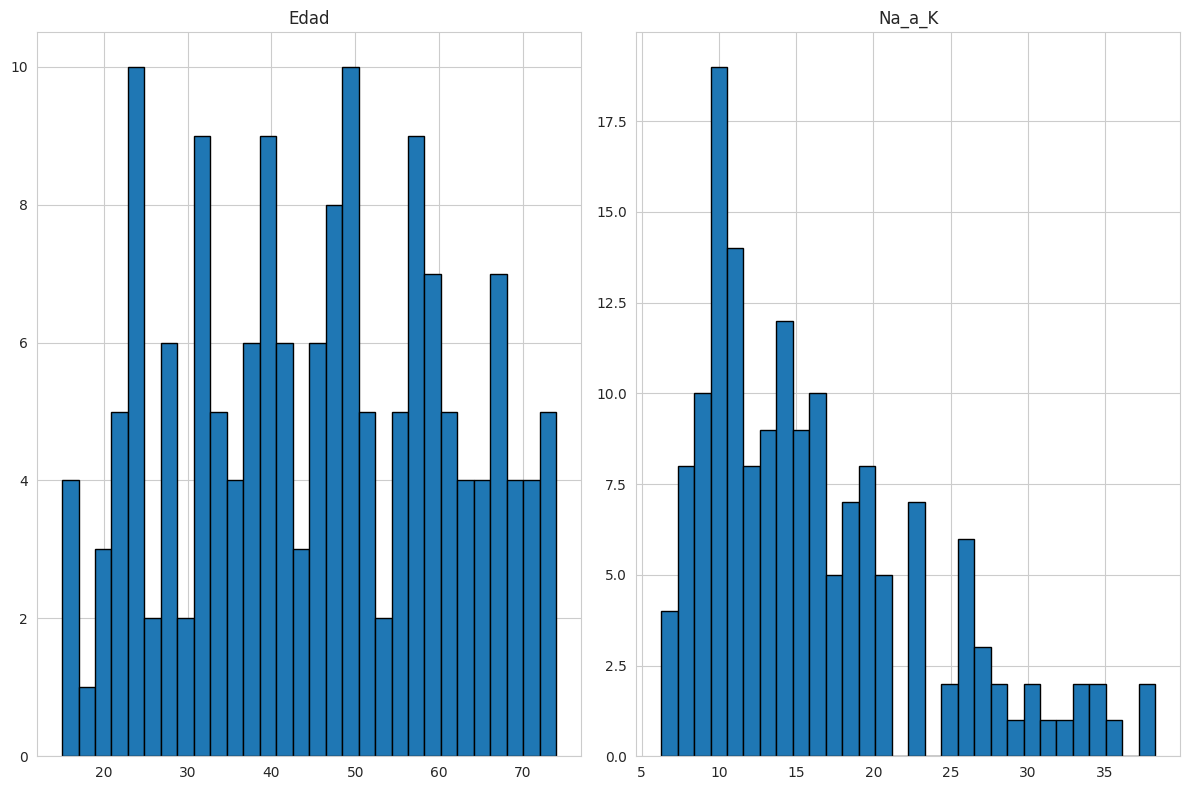

In [96]:
X_train_d1[['Edad','Na_a_K']].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.show()

Los niveles de sodio, se puede apreciar que tiene una distibución asimetrica hacia la derecha.  
Con respecto a edad, se puede apreciar que tiene una distribución bastante simetrica.

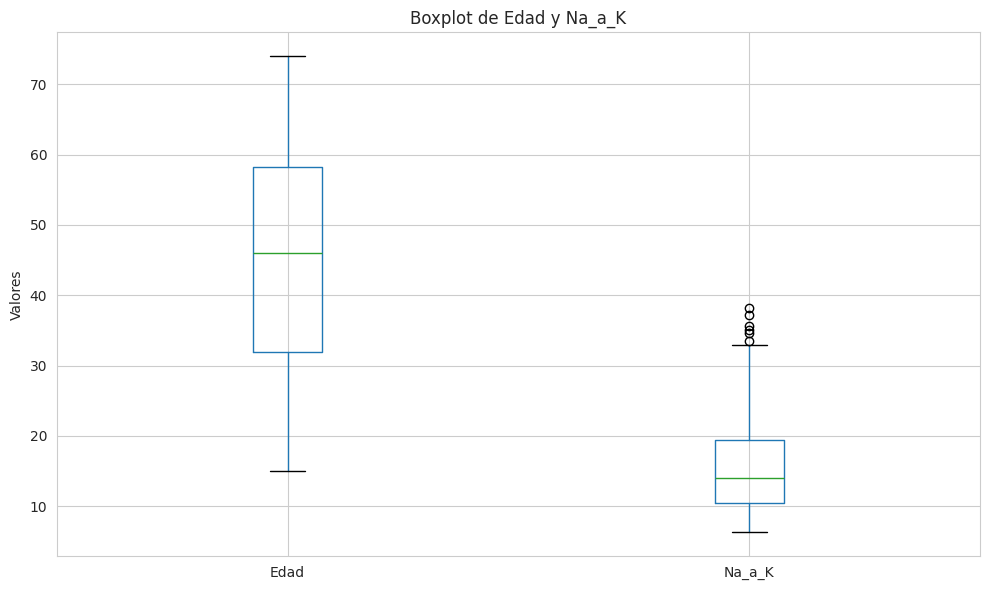

In [97]:
# Se observa que la variable Na_a_K, tiene valores atipicos
plt.figure(figsize=(10, 6))
X_train_d1.boxplot()
plt.title('Boxplot de Edad y Na_a_K')
plt.ylabel('Valores')
plt.grid(True)
plt.tight_layout()
plt.show()

Con el boxplot, nos confirma hay presencia de outliers para el sodio, aunque, esta se pueda explicarse con alguna otra variable.

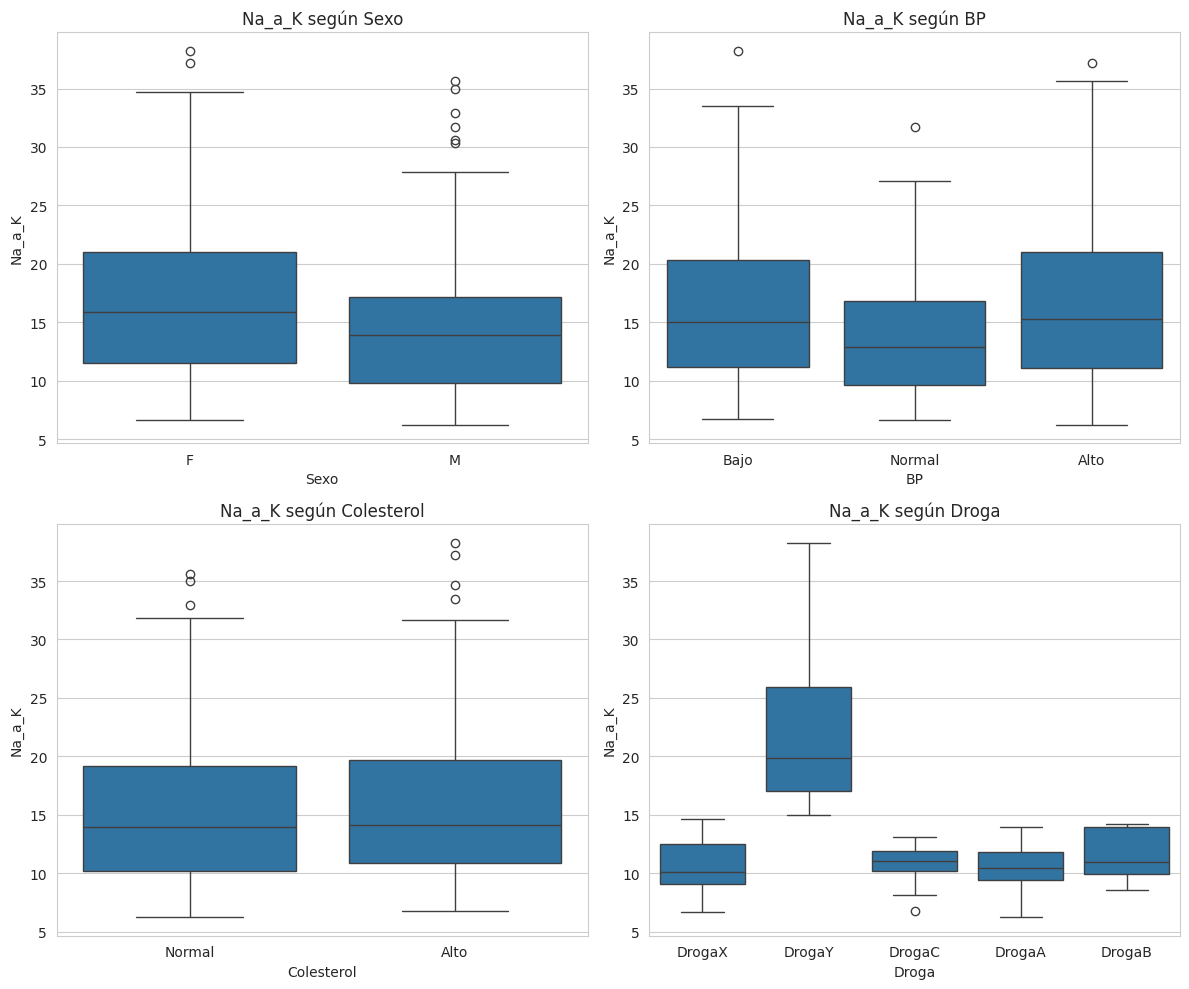

In [98]:
"""
Graficamos la relación entre las variables categóricas y la variable continua Na_a_K
Para ver si hay alguna relación entre las variables categóricas y la variable continua Na_a_K
y se puede llegar a explicar los valores atípicos de dicha variable.
"""

# Crear copia de X_train_d1 incluyendo la variable target
df_visualizacion_d = X_train_d1.copy()
df_visualizacion_d['Droga'] = y_train_d1  # asumimos que esta es la variable target

# Identificar variables categóricas
variables_categoricas = df_visualizacion_d.select_dtypes(include='object').columns

# Configurar subplots: 2 filas, 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # ajustá el tamaño según necesites
axes = axes.flatten()  # para iterar fácilmente

# Graficar
for i, col in enumerate(variables_categoricas):
    sns.boxplot(data=df_visualizacion_d, x=col, y='Na_a_K', ax=axes[i])
    axes[i].set_title(f'Na_a_K según {col}')
    axes[i].tick_params(axis='x', rotation=0)

# Si hay menos de 4 variables, ocultar los ejes sobrantes
for j in range(len(variables_categoricas), 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Se puede observar que los outliers de Na_a_K, se pueden explicar, con la drogaY. Ya que en esta droga, los valores de Na_a_k son mucho mayores a los de cualquier otra droga. Por lo que no se van a considerase como outliers dichos valores.

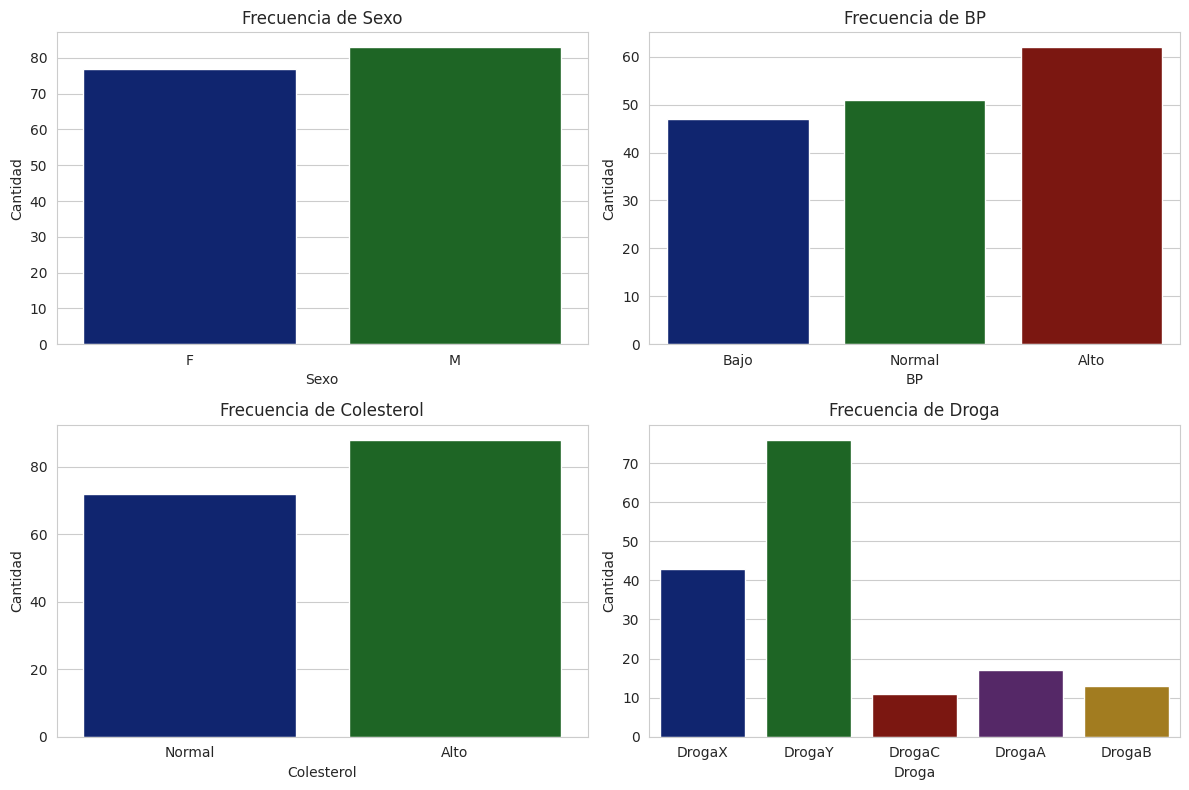

In [99]:
# Variables categóricas a graficar
variables_categoricas = ['Sexo', 'BP', 'Colesterol', 'Droga']

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Crear los countplots
for i, col in enumerate(variables_categoricas):
    sns.countplot(data=df_visualizacion_d, x=col, hue=col, ax=axes[i], palette="dark6")
    axes[i].set_title(f'Frecuencia de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Cantidad')
    axes[i].tick_params(axis='x', rotation=0)

# Ajustar espaciado
plt.tight_layout()
plt.show()

Se observa una mayor proporción de hombres, presión arterial alta y colesterol alto, siendo las drogas más utilizadas DrogaY y DrogaX

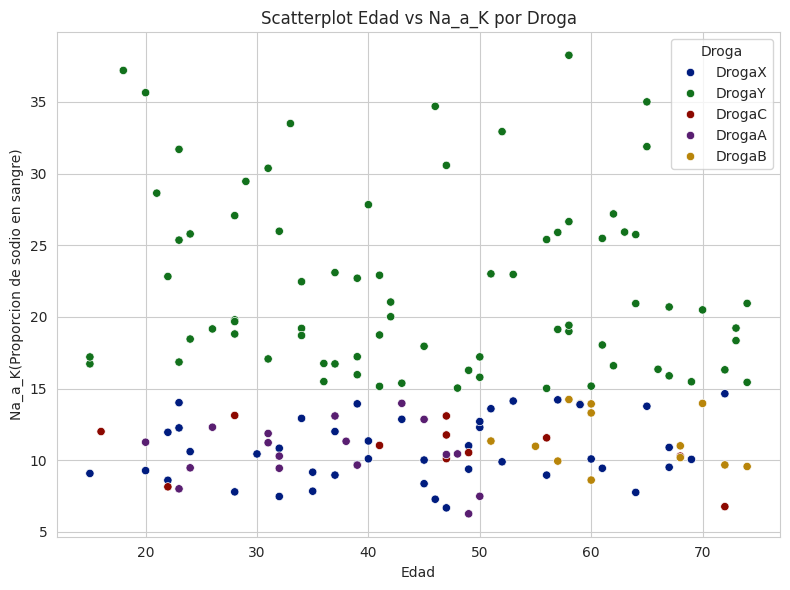

In [100]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_visualizacion_d, x='Edad', y='Na_a_K', hue='Droga', palette='dark6')
plt.title('Scatterplot Edad vs Na_a_K por Droga')
plt.xlabel('Edad')
plt.ylabel('Na_a_K(Proporcion de sodio en sangre)')
plt.tight_layout()
plt.show()

El gráfico muestra un patrón interesante: todas las observaciones con valores de Na_a_K mayores a 15 corresponden exclusivamente a la DrogaY. Esto sugiere que existe una relación fuerte entre niveles altos de Na/K y la asignación de esta droga. Aunque no se puede determinar la causa exacta, este comportamiento indica que la proporción Na/K podría estar funcionando como un criterio clave para la elección de DrogaY dentro del conjunto de datos.










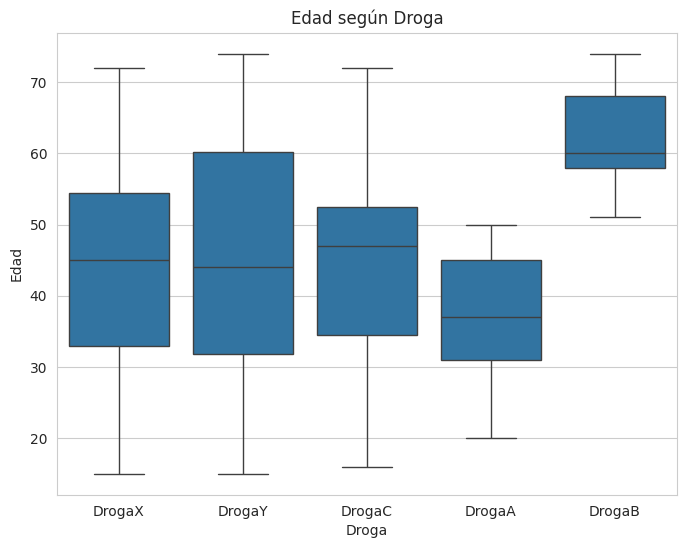

In [101]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_visualizacion_d, x='Droga', y='Edad')
plt.title('Edad según Droga')
plt.show()


En el boxplot de Edad según Droga, se aprecia que la Droga A tiende a asignarse a pacientes más jóvenes en comparación con las otras drogas. Las medianas de edad para las demás drogas, como Droga Y, Droga C y Droga X, se encuentran en rangos intermedios, mientras que la Droga B está claramente asociada a pacientes de mayor edad. Esto sugiere que el tipo de droga administrada podría estar relacionado con la edad del paciente, posiblemente debido a diferencias en las características clínicas o necesidades terapéuticas según el grupo etario.



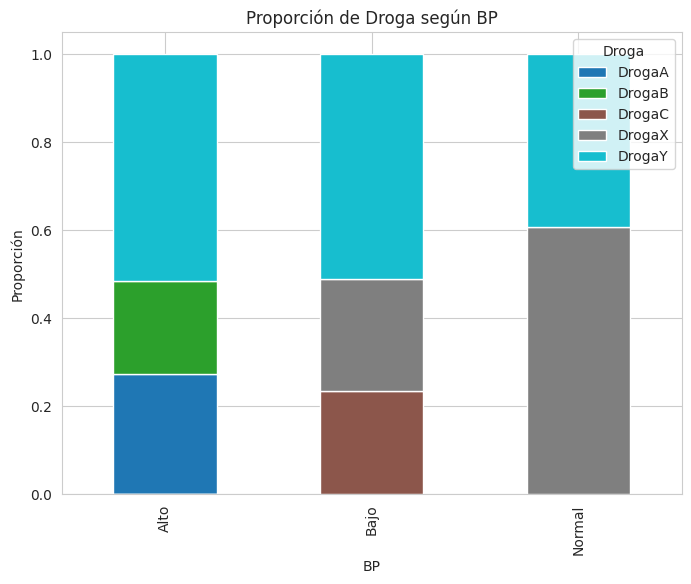

In [102]:
ct = pd.crosstab(df_visualizacion_d['BP'], df_visualizacion_d['Droga'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(8,6), colormap='tab10')
plt.ylabel('Proporción')
plt.title('Proporción de Droga según BP')
plt.legend(title='Droga')
plt.show()


En el gráfico se observa que la DrogaY está presente en todos los niveles de presión sanguínea, lo que sugiere que es un medicamento de uso más generalizado. Por otro lado, la DrogaA y la DrogaB aparecen únicamente en pacientes con presión alta, indicando una posible indicación específica para ese grupo. La DrogaC se limita exclusivamente a pacientes con presión baja, mientras que la DrogaX está presente tanto en pacientes con presión baja como en aquellos con presión normal, pero no en los de presión alta.

Estos patrones reflejan cómo el tipo de medicamento está asociado de manera clara con el nivel de presión sanguínea del paciente.

## Codificación

In [103]:
# Lista de columnas categóricas que queremos codificar
categorical_cols = ['Sexo', 'BP', 'Colesterol']

# Codificamos la partición 80/20
for col in categorical_cols:
    le = LabelEncoder()
    X_train_d1[col] = le.fit_transform(X_train_d1[col])
    X_test_d1[col] = le.transform(X_test_d1[col])

# Codificamos la partición 70/30
for col in categorical_cols:
    le = LabelEncoder()
    X_train_d2[col] = le.fit_transform(X_train_d2[col])
    X_test_d2[col] = le.transform(X_test_d2[col])


## Escalado

In [104]:
# Columnas a escalar
columnas_a_escalar = ['Edad', 'Na_a_K']

# Inicializamos el escalador
scaler = StandardScaler()

# Escalador para la partición 80/20
scaler_80_20 = StandardScaler()
X_train_d1[columnas_a_escalar] = scaler_80_20.fit_transform(X_train_d1[columnas_a_escalar])
X_test_d1[columnas_a_escalar] = scaler_80_20.transform(X_test_d1[columnas_a_escalar])

# Escalador para la partición 70/30
scaler_70_30 = StandardScaler()
X_train_d2[columnas_a_escalar] = scaler_70_30.fit_transform(X_train_d2[columnas_a_escalar])
X_test_d2[columnas_a_escalar] = scaler_70_30.transform(X_test_d2[columnas_a_escalar])

# Ejercicio N° 4 Predicción con Arboles de Decisión

### Árbol sin Podar

In [105]:
# Entrenar árbol sin poda (sin parámetros restrictivos)

# 80-20
arbol_sin_poda_80_20 = DecisionTreeClassifier(random_state=42)
arbol_sin_poda_80_20.fit(X_train_d1, y_train_d1)

# 70-30
arbol_sin_poda_70_30 = DecisionTreeClassifier(random_state=42)
arbol_sin_poda_70_30.fit(X_train_d2, y_train_d2)


DecisionTreeClassifier(random_state=42)

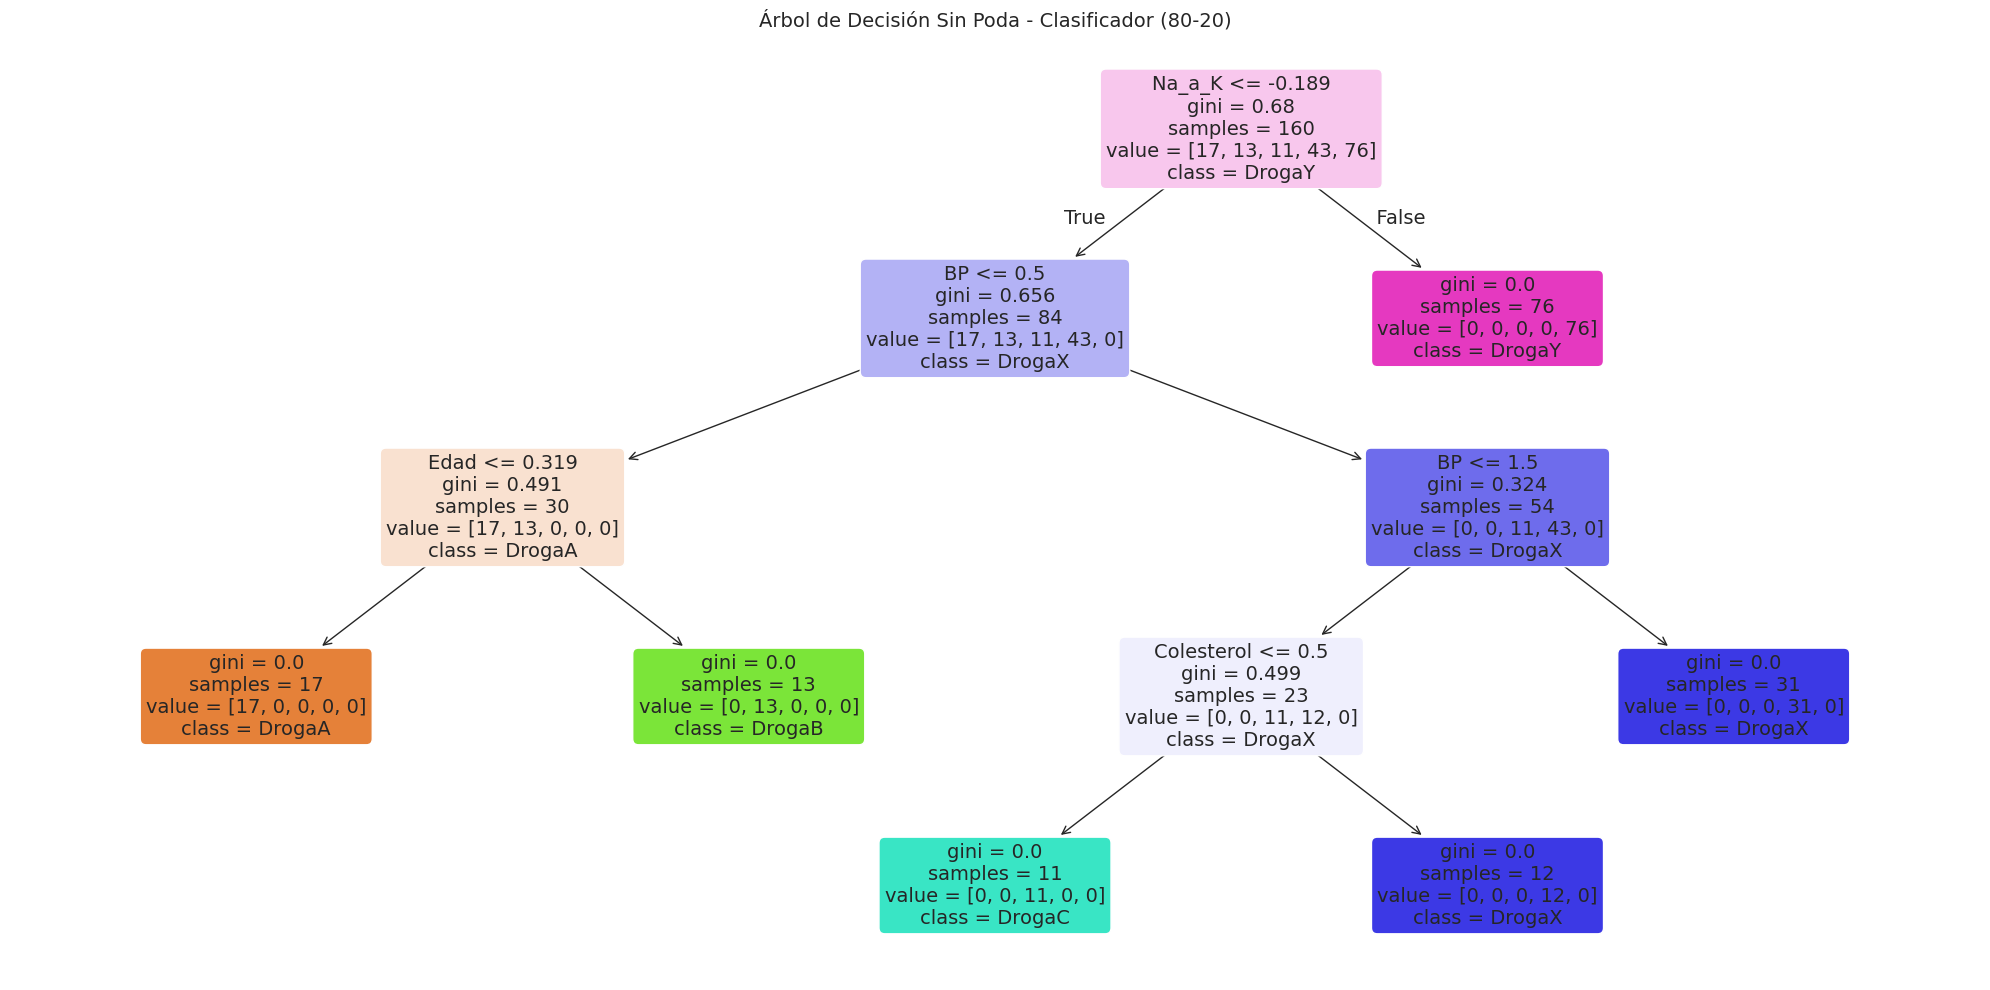

In [106]:
def graficar_arbol_clasificador(modelo, feature_names, titulo="Árbol de Decisión"):
    plt.figure(figsize=(20, 10))
    plot_tree(
        modelo,
        feature_names=feature_names,
        class_names=modelo.classes_.astype(str),  # Mostrar clases
        filled=True,
        rounded=True,
        fontsize=14,
        impurity=True,
    )
    plt.title(titulo, fontsize=14)
    plt.tight_layout()
    plt.show()

# Graficar árbol sin poda
graficar_arbol_clasificador(arbol_sin_poda_80_20, X_train_d1.columns, "Árbol de Decisión Sin Poda - Clasificador (80-20)")


In [107]:
# Creamos una función para evaluar el modelo
def evaluar_modelo(y_true, y_pred, conjunto=""):
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)

    print(f"Resultados para el conjunto {conjunto}:")
    print(f"Precisión:     {precision:.4f}")
    print(f"Exhaustividad: {recall:.4f}")
    print(f"Exactitud:     {accuracy:.4f}\n")

In [108]:
# Hacemos la predicción en el conjunto de test (80-20)
y_test_pred = arbol_sin_poda_80_20.predict(X_test_d1)

# Hacemos la predicción en el conjunto de test (70-30)
y_test_pred_70_30 = arbol_sin_poda_70_30.predict(X_test_d2)


evaluar_modelo(y_test_d1, y_test_pred, "TEST (80-20)")
evaluar_modelo(y_test_d2, y_test_pred_70_30, "TEST (70-30)")


Resultados para el conjunto TEST (80-20):
Precisión:     1.0000
Exhaustividad: 1.0000
Exactitud:     1.0000

Resultados para el conjunto TEST (70-30):
Precisión:     1.0000
Exhaustividad: 1.0000
Exactitud:     1.0000



### Arbol Podado

In [109]:
tree_classifier = DecisionTreeClassifier(random_state=42)

In [110]:
# Definimos los parámetros a ajustar para clasificación
param_grid_classifier = {
    'max_depth': [3, 5, 7, 10, None],  # Valores de profundidad máxima
    'min_samples_split': [2, 5, 10, 20],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 10, 20],  # Número mínimo de muestras por hoja
    'criterion': ['gini', 'entropy']  # Criterio para el cálculo del error en clasificación
}


# Ajustar el modelo en el conjunto 80-20
grid_search_80_20_class = GridSearchCV(estimator=tree_classifier, param_grid=param_grid_classifier, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_80_20_class.fit(X_train_d1, y_train_d1)
best_tree_classifier_80_20 = grid_search_80_20_class.best_estimator_

# Ajustar el modelo en el conjunto 70-30
grid_search_70_30_class = GridSearchCV(estimator=tree_classifier, param_grid=param_grid_classifier, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_70_30_class.fit(X_train_d2, y_train_d2)
best_tree_classifier_70_30 = grid_search_70_30_class.best_estimator_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados en partición 80-20:", grid_search_80_20_class.best_params_)
print("Mejores hiperparámetros encontrados en partición 70-30:", grid_search_70_30_class.best_params_)


Mejores hiperparámetros encontrados en partición 80-20: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejores hiperparámetros encontrados en partición 70-30: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Visualización del árbol podado

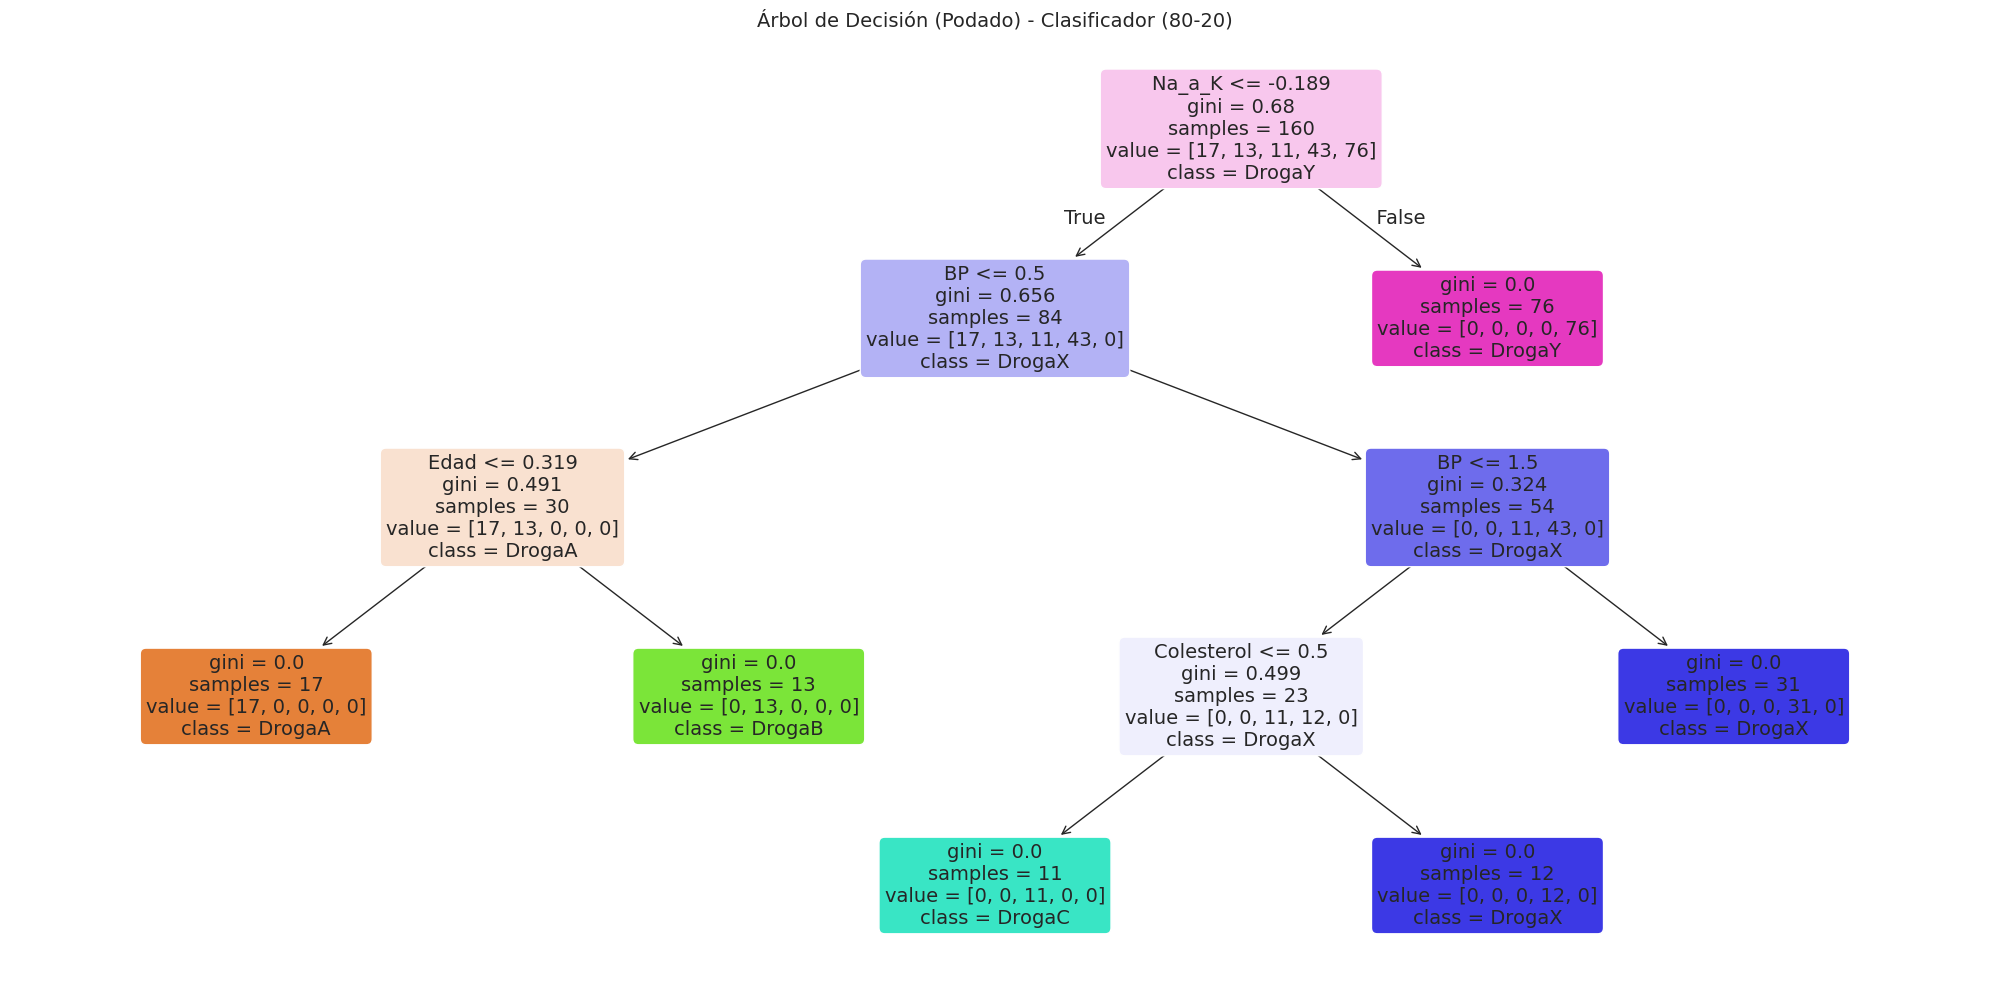

In [111]:
graficar_arbol_clasificador(best_tree_classifier_80_20, X_train_d1.columns, "Árbol de Decisión (Podado) - Clasificador (80-20)")

In [112]:
# Hacemos la predicción en el conjunto de test (80-20)
y_test_pred = best_tree_classifier_80_20.predict(X_test_d1)

# Hacemos la predicción en el conjunto de test (70-30)
y_test_pred_70_30 = best_tree_classifier_70_30.predict(X_test_d2)


evaluar_modelo(y_test_d1, y_test_pred, "TEST (80-20)")
evaluar_modelo(y_test_d2, y_test_pred_70_30, "TEST (70-30)")


Resultados para el conjunto TEST (80-20):
Precisión:     1.0000
Exhaustividad: 1.0000
Exactitud:     1.0000

Resultados para el conjunto TEST (70-30):
Precisión:     1.0000
Exhaustividad: 1.0000
Exactitud:     1.0000



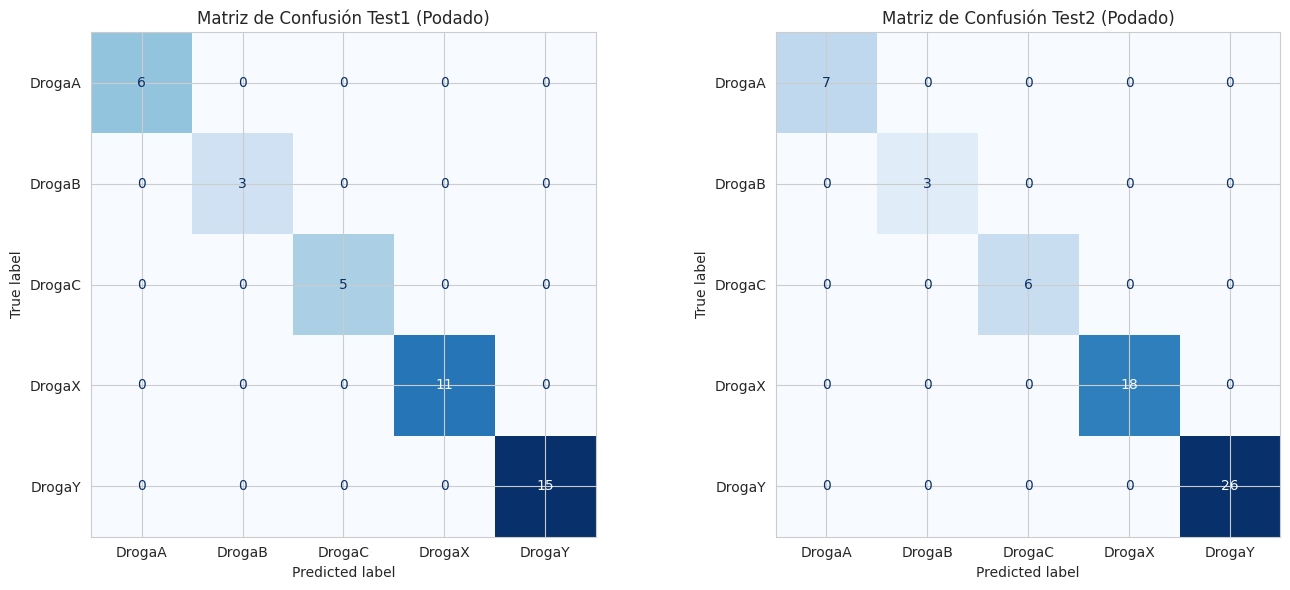

In [113]:
def mostrar_matrices_confusion(modelo, X_tests, y_tests, titulos):
    fig, axes = plt.subplots(1, len(X_tests), figsize=(14, 6))  # 1 fila, n columnas

    for i, (X_test, y_test, titulo) in enumerate(zip(X_tests, y_tests, titulos)):
        y_pred = modelo.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
        disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
        axes[i].set_title(titulo)

    plt.tight_layout()
    plt.show()

# Visualizacion con test1 y test2 para el modelo podado 80-20
X_tests = [X_test_d1, X_test_d2]   # reemplazá con tus variables reales de test
y_tests = [y_test_d1, y_test_d2]   # idem
titulos = ['Matriz de Confusión Test1 (Podado)', 'Matriz de Confusión Test2 (Podado)']

mostrar_matrices_confusion(best_tree_classifier_80_20, X_tests, y_tests, titulos)


Se observa un rendimiento consistentemente perfecto del modelo en ambos conjuntos de prueba. Todas las instancias han sido clasificadas correctamente, lo que se evidencia en que todos los valores se encuentran en la diagonal principal de cada matriz, y todas las demás celdas tienen valor cero.

Esto indica que el modelo tiene una capacidad de discriminación excelente entre las clases de estos subconjuntos de prueba.



# Ejercicio 5

## Discretizamos

In [114]:
continuas = ['Edad', 'Na_a_K']
categoricas = ['Sexo', 'BP', 'Colesterol']

# ====== Para la división 80/20 ======
X_train_continuas_1 = X_train_d1[continuas]
X_test_continuas_1 = X_test_d1[continuas]

# Discretizador para la división 80/20
discretizador_1 = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

X_train_cont_discret_1 = discretizador_1.fit_transform(X_train_continuas_1)
X_test_cont_discret_1 = discretizador_1.transform(X_test_continuas_1)

X_train_cont_discret_df_1 = pd.DataFrame(X_train_cont_discret_1, columns=continuas, index=X_train_d1.index)
X_test_cont_discret_df_1 = pd.DataFrame(X_test_cont_discret_1, columns=continuas, index=X_test_d1.index)

X_train_discret = pd.concat([X_train_cont_discret_df_1, X_train_d1[categoricas]], axis=1)
X_test_discret = pd.concat([X_test_cont_discret_df_1, X_test_d1[categoricas]], axis=1)

# ====== Para la división 70/30 ======
X_train_continuas_2 = X_train_d2[continuas]
X_test_continuas_2 = X_test_d2[continuas]

# Discretizador para la división 70/30
discretizador_2 = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

X_train_cont_discret_2 = discretizador_2.fit_transform(X_train_continuas_2)
X_test_cont_discret_2 = discretizador_2.transform(X_test_continuas_2)

X_train_cont_discret_df_2 = pd.DataFrame(X_train_cont_discret_2, columns=continuas, index=X_train_d2.index)
X_test_cont_discret_df_2 = pd.DataFrame(X_test_cont_discret_2, columns=continuas, index=X_test_d2.index)

X_train_discret2 = pd.concat([X_train_cont_discret_df_2, X_train_d2[categoricas]], axis=1)
X_test_discret2 = pd.concat([X_test_cont_discret_df_2, X_test_d2[categoricas]], axis=1)


## Entrenamos Naive Bayes

In [115]:
# Inicializamos el modelo Naive Bayes Categórico
# ====== Modelo para 80/20 ======
modelo_nb1 = CategoricalNB()
modelo_nb1.fit(X_train_discret, y_train_d1)

y_pred_train_1 = modelo_nb1.predict(X_train_discret)
y_pred_test_1 = modelo_nb1.predict(X_test_discret)

# ====== Modelo para 70/30 ======
modelo_nb2 = CategoricalNB()
modelo_nb2.fit(X_train_discret2, y_train_d2)

y_pred_train_2 = modelo_nb2.predict(X_train_discret2)
y_pred_test_2 = modelo_nb2.predict(X_test_discret2)

## Matriz de Confusión

In [116]:
def mostrar_dos_matrices_confusion(modelo1, X_test1, y_test1, titulo1,
                                  modelo2, X_test2, y_test2, titulo2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

    # Matriz 1
    y_pred1 = modelo1.predict(X_test1)
    cm1 = confusion_matrix(y_test1, y_pred1)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=modelo1.classes_)
    disp1.plot(ax=axes[0], cmap=plt.cm.Blues, colorbar=False)
    axes[0].set_title(titulo1)

    # Matriz 2
    y_pred2 = modelo2.predict(X_test2)
    cm2 = confusion_matrix(y_test2, y_pred2)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=modelo2.classes_)
    disp2.plot(ax=axes[1], cmap=plt.cm.Blues, colorbar=False)
    axes[1].set_title(titulo2)

    plt.tight_layout()
    plt.show()


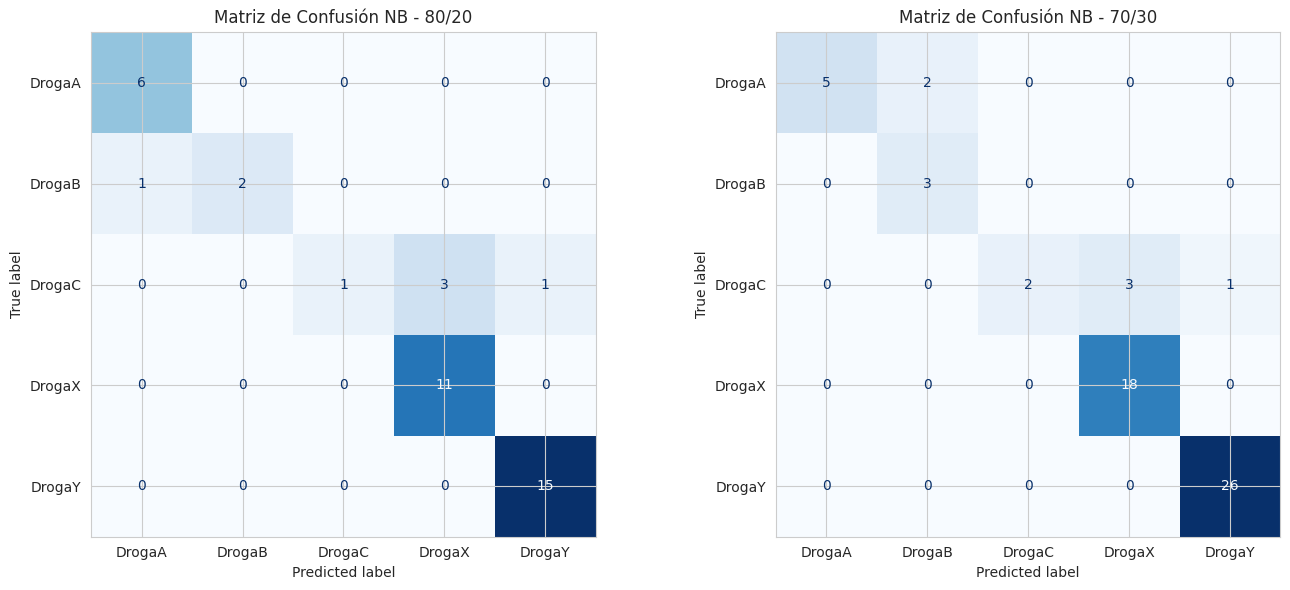

In [117]:
mostrar_dos_matrices_confusion(
    modelo_nb1, X_test_discret, y_test_d1, 'Matriz de Confusión NB - 80/20',
    modelo_nb2, X_test_discret2, y_test_d2, 'Matriz de Confusión NB - 70/30'
)


En el caso del 70% se puede apreciar que presenta una mayor cantidad de predicciones erradas, donde clasificó un total de 6 errores (un 10% de los datos a predecir), en cambio el 80%, obtuvo 5 errores (12.5% de los datos a predecir).   
Aunque el modelo cometió menos errores absolutos con el 80% de entrenamiento (5 errores frente a 6), el porcentaje de error fue mayor debido al menor tamaño del conjunto de prueba.

Por tanto, en este caso, la división 70-30 mostró un mejor desempeño relativo, con una menor tasa de error sobre los datos a predecir

# Ejercicio 6

In [118]:
# Función para buscar los mejores parámetros con GridSearchCV
def buscar_mejores_parametros_grid(X_train, y_train):
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'p': [1, 2]
    }

    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_, grid_search.best_estimator_

# Función para evaluar el modelo
def evaluar_modelo_simple(modelo, X_test, y_test, nombre_conjunto):
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']

    print(f"{nombre_conjunto} — Exactitud={acc:.3f}, Precisión={precision:.3f}, Exhaustividad={recall:.3f}")

    # Devuelvo la matriz de confusión para graficarla luego
    cm = confusion_matrix(y_test, y_pred)
    etiquetas = sorted(set(y_test))
    return cm, etiquetas


🔍 Mejores parámetros k-NN (80/20): {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1}
🔍 Mejores parámetros k-NN (70/30): {'metric': 'euclidean', 'n_neighbors': 5, 'p': 1}
Test1 — Exactitud=0.925, Precisión=0.939, Exhaustividad=0.925
Test2 — Exactitud=0.883, Precisión=0.939, Exhaustividad=0.883


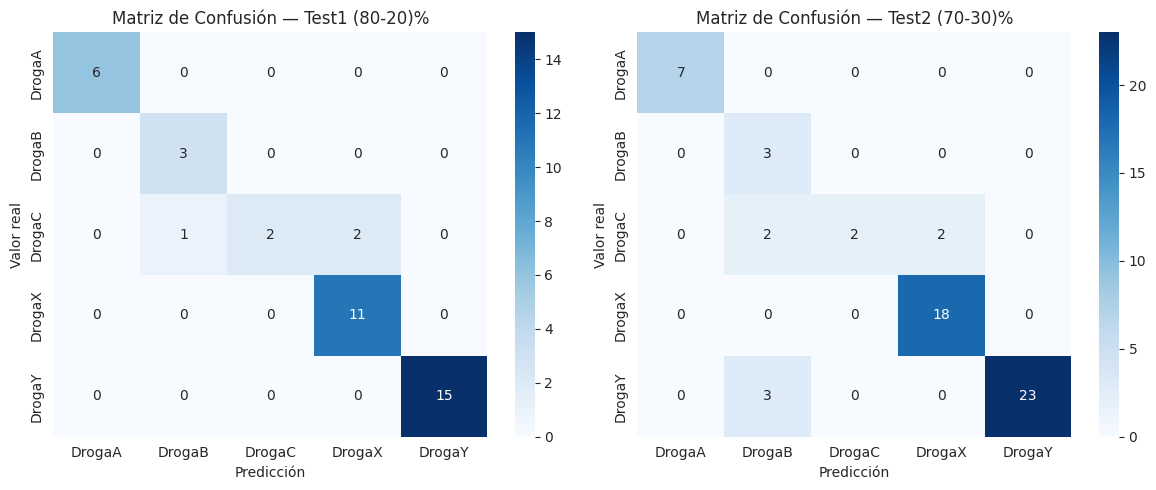

In [119]:
# Entrenamiento y evaluación en conjunto d1 (80/20)
mejores_params_d1, modelo_d1 = buscar_mejores_parametros_grid(X_train_d1, y_train_d1)
mejores_params_d2, modelo_d2 = buscar_mejores_parametros_grid(X_train_d2, y_train_d2)

print("🔍 Mejores parámetros k-NN (80/20):", mejores_params_d1)
print("🔍 Mejores parámetros k-NN (70/30):", mejores_params_d2)

# Evaluación y obtención de matrices
cm_d1, etiquetas_d1 = evaluar_modelo_simple(modelo_d1, X_test_d1, y_test_d1, "Test1")
cm_d2, etiquetas_d2 = evaluar_modelo_simple(modelo_d2, X_test_d2, y_test_d2, "Test2")

# Mostrar las dos matrices una al lado de la otra
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_d1, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=etiquetas_d1, yticklabels=etiquetas_d1)
axes[0].set_title("Matriz de Confusión — Test1 (80-20)%")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Valor real")

sns.heatmap(cm_d2, annot=True, fmt="d", cmap="Blues", ax=axes[1],
            xticklabels=etiquetas_d2, yticklabels=etiquetas_d2)
axes[1].set_title("Matriz de Confusión — Test2 (70-30)%")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Valor real")

plt.tight_layout()
plt.show()


En el caso del 70% se puede apreciar que presenta una mayor cantidad de predicciones erradas, donde clasificó un total de 7 errores (un 11.7% de los datos a predecir), en cambio el 80% obtuvo solamente 3 errores (7.5% de los datos a predecir).   
Aunque el modelo usó una menor proporción de datos para prueba en la división 80-20, logró una menor cantidad absoluta y relativa de errores (3 frente a 7), lo que indica un mejor rendimiento general.

Por tanto, en este caso, la división 80-20 mostró un mejor desempeño relativo, con una menor tasa de error sobre los datos a predecir.

# Conclusiones

A lo largo de trabajo practico, se realizo la preparacion de dos dataset distintos, donde uno es de companias, y el otro de distintas drogas.

Con el dataset de companias, encontramos que los mejores hiperparametros para el arbol de regresion de decisión, fueron: criterion: squared_error, max_depth: 10, min_samples_leaf: 1, min_samples_split: 2. Aunque las métricas obtenidas para el conjunto de prueba, como el MSE (Error Cuadrático Medio), fueron un poco más altas de lo esperado, esto se debe principalmente a la presencia de outliers en los datos. El Profit de las empresas muestra una gran variabilidad, con algunos valores que van desde 14 mil dólares hasta 500 mil dólares. Si bien estos outliers contribuyen a un mayor error global, también permiten que el modelo generalice mejor. Al incluir estos valores extremos, el modelo aprende a predecir con mayor precisión valores altos de Profit, lo que a su vez mejora su capacidad para captar la variabilidad real del negocio. Por lo tanto, aunque el MSE es más alto, esto refleja una mejor capacidad predictiva en términos de predicción de grandes valores de Profit

Para el conjunto del dataset de drogras, aplicamos distintos modelos predictorios: clasificación de arbol de decisión, k-NN y CategoricalNB.
Luego de evaluar el desempeño los diferentes modelos mencionados, pudimos llegar a la conclusión de que el mejor modelo predictorio para clasificar el tipo de droga, es con el de arbol de decision, prediciendo totalmente las diferentes tipos de drogas. Donde a pesar de que optimizamos los hiperparametros para podar el arbol, no muestra que haya cambiado con respecto a que si no lo hubieramos podado.

--------------------------------------------------
A partir de los dos dataset utilizados, podemos llegar a la conclusion que con la división de 80-20 es mejor que 70-30 debido a:

* En conjuntos de datos pequeños, al usar una proporción menor para el entrenamiento (como en el caso del 70%), se dispondrá de menos datos para entrenar el modelo, lo que dificulta la capacidad de aprender patrones representativos.

* Con una mayor cantidad de datos en el conjunto de entrenamiento (80%), el modelo puede aprender de manera más efectiva, lo que mejora su generalización.

* Con una división 70-30, la cantidad de datos disponibles para entrenamiento no es suficiente, lo que puede llevar a un sobreajuste (overfitting) y, por ende, a un mal desempeño en la predicción sobre datos nuevos.

En conclusión, en situaciones con datasets pequeños, la división 80-20 resulta más efectiva, ya que permite una mejor generalización y un rendimiento más confiable.

--------------------------------------------------